DATA EXPLORATION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from datetime import datetime
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from xgboost import XGBClassifier



df = pd.read_csv('profiles.csv')

In [2]:
columns = list(df.columns)
print(columns)
print(df.shape)
print(df.dtypes)

['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
(59946, 31)
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object


In [3]:
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [4]:
# Find missing values
print(df.isnull().sum())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [6]:
withnull = df[df.isnull().any(axis=1)]
print(withnull.head())

   age body_type             diet    drinks      drugs  \
1   35   average     mostly other     often  sometimes   
2   38      thin         anything  socially        NaN   
3   23      thin       vegetarian  socially        NaN   
4   29  athletic              NaN  socially      never   
5   29   average  mostly anything  socially        NaN   

                           education  \
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   
5  graduated from college/university   

                                              essay0  \
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   
5  i'm an australian living in san francisco, but...   

                                              essay1  \
1  dedicating eve

In [7]:
for col in columns:
    print(df[col].value_counts(dropna=False))


age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64
body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198


In [8]:
print(df['location'].value_counts(dropna=False))

location
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: count, Length: 199, dtype: int64


DATA CLEANING

In [9]:
# remove rows with impossible values
df = df[~df['age'].isin([109, 110])]

# set NaN in various columns to rather not say
colstofill = ['body_type', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks', 'job']
for col in colstofill:
    df[col].fillna("rather not say", inplace=True)

# remove rows with outliers for height
df = df[(df['height'] >= 48) & (df['height'] <= 84)]

# we are trying to predict status so we dont really want unknowns
df = df[(df['status'] != 'unknown')]

# Make new city and state/country columns
# Perform the split and expand to ensure two columns are always produced
split_location = df['location'].str.split(', ', n=1, expand=True)

# If the location does not have a comma, the second column might be filled with NaN
# replace with Unknown
split_location[1] = split_location[1].fillna('Unknown')

# Assign the split columns back to the DataFrame with the correct column names
df[['city', 'state_country']] = split_location

df['zodiac_sign'] = df['sign'].str.extract(r'(^[\w]+)')
df['zodiac_sign'] = df['zodiac_sign'].replace('rather', 'rather not say')

def categorizeZodiac(row):
    if pd.isnull(row) or row == 'rather not say':
        return 'neutral'
    elif 'it&rsquo;s fun to think about' in row:
        return "it's fun to think about"
    elif 'doesn&rsquo;t matter' in row:
        return 'neutral'
    elif 'matters a lot' in row:
        return 'it matters a lot'
    else:
        # Just in case lol ;) 
        return 'neutral'

df['astrology_interest'] = df['sign'].apply(categorizeZodiac)

df['religion_type'] = df['religion'].str.extract(r'(^[\w]+)')
df['religion_type'] = df['religion_type'].replace('rather', 'rather not say')


def categorizeReligiosity(row):
    if pd.isnull(row) or row == 'rather not say':
        return 'neutral'
    elif 'but not too serious about it' in row:
        return 'not serious'
    elif 'and laughing about it' in row:
        return 'laughing about it'
    elif 'and somewhat serious about it' in row:
        return 'somewhat serious'
    elif 'and very serious about it' in row:
        return 'very serious'
    else:
        return 'neutral'

df ['religion_importance'] = df['religion'].apply(categorizeReligiosity)

df = df[df['income'] <= 500000]

def findAgeDecade(row):
    return f"{(row // 10) * 10}s"
    
df['age_decade'] = df['age'].apply(findAgeDecade)


def findAgePercentiles(group):
    filtered_group = group[group['income'] > -1]
    lo = filtered_group['income'].quantile(0.25)
    hi = filtered_group['income'].quantile(0.75)
    return pd.Series({'low_threshold': lo, 'high_threshold': hi})


# Calculate thresholds for each age_decade
thresholds = df.groupby('age_decade').apply(findAgePercentiles).reset_index()

df = pd.merge(df, thresholds, on='age_decade', how='left')

# Function to categorize income based on the thresholds
def categorize_income(row):
    if row['income'] == -1:
        return 'unknown'
    elif row['income'] <= row['low_threshold']:
        return 'low income'
    elif row['income'] > row['high_threshold']:
        return 'high income'
    else:
        return 'middle income'

# Apply the categorization function
df['income_category'] = df.apply(categorize_income, axis=1)

In [10]:
columns = list(df.columns)
print(columns)

['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'city', 'state_country', 'zodiac_sign', 'astrology_interest', 'religion_type', 'religion_importance', 'age_decade', 'low_threshold', 'high_threshold', 'income_category']


DATA VISUALIZATION

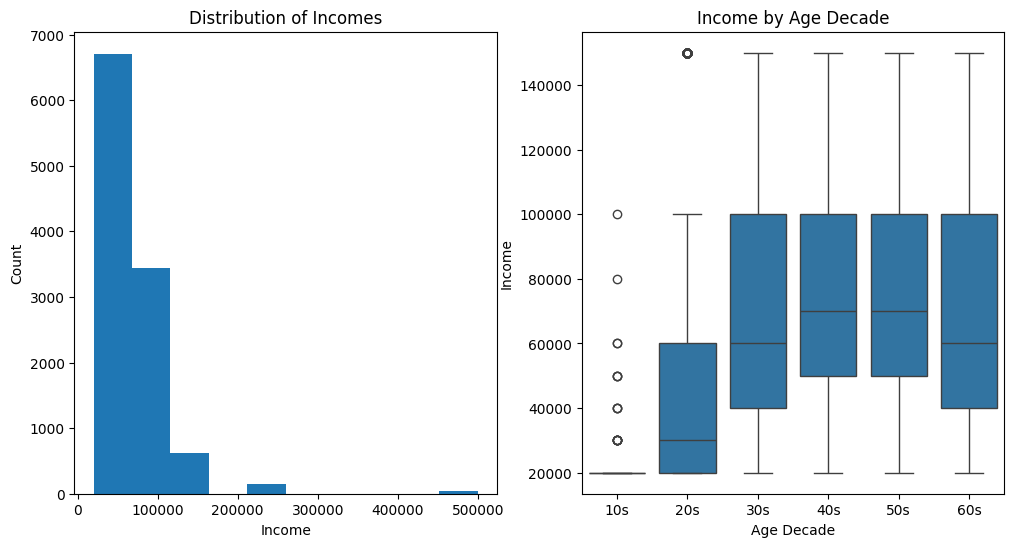

<Figure size 640x480 with 0 Axes>

In [11]:
filtered = df[(df['income'] > 0)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot income 
axes[0].hist(filtered['income'])
axes[0].set_title("Distribution of Incomes")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Count")


# Plot boxplots of income by age decade
filteredIncomes = df[(df['income'] > 0) & (df['income'] < 200000)]
sns.boxplot(x='age_decade', y='income', data=filteredIncomes, order=sorted(filteredIncomes['age_decade'].unique()))
axes[1].set_xlabel('Age Decade')
axes[1].set_ylabel('Income')
axes[1].set_title('Income by Age Decade')

plt.show()
plt.clf()



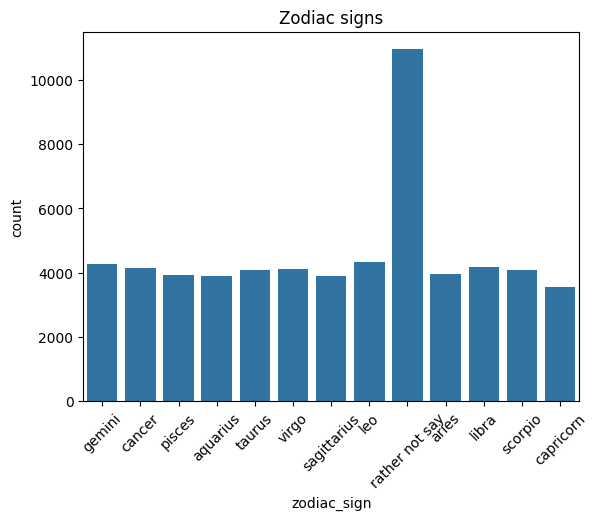

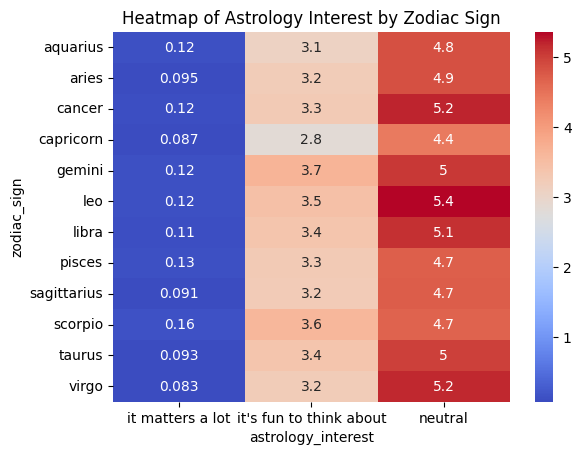

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot zodiac signs
sns.countplot(x='zodiac_sign', data=df)
plt.title("Zodiac signs")
plt.xticks(rotation=45)
plt.show()
plt.clf()

zodiacfilter = df[df['zodiac_sign'] != 'rather not say']
contingency_table = pd.crosstab(zodiacfilter['zodiac_sign'], zodiacfilter['astrology_interest'])
contingency_table = contingency_table / len(zodiacfilter) * 100
contingency_table = contingency_table.loc[sorted(contingency_table.index)]

# Make a heatmap. excluding rather not say otherwise it kind of throws it off and isnt as interesting 
sns.heatmap(contingency_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Astrology Interest by Zodiac Sign')
plt.show()
plt.clf()

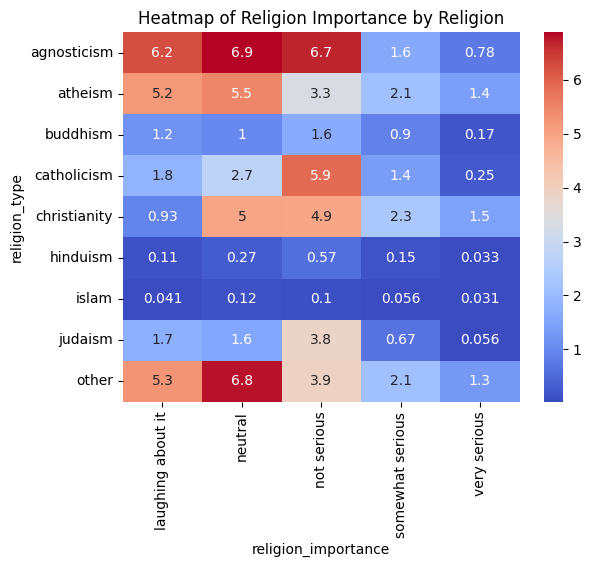

<Figure size 640x480 with 0 Axes>

In [13]:
filteredreligion = df[df['religion_type'] != 'rather not say']
religion_importance_freq = pd.crosstab(filteredreligion.religion_type, filteredreligion.religion_importance)
religion_importance_freq = religion_importance_freq/len(filteredreligion) * 100

sns.heatmap(religion_importance_freq, annot=True, cmap='coolwarm')
plt.title('Heatmap of Religion Importance by Religion')
plt.show()
plt.clf()

PREP FOR TRAINING

In [14]:

numerical_features = ['age', 'height', 'income']
categorical_cols = ['body_type', 'diet', 'ethnicity', 'job', 'location', 'offspring', 'orientation', 'pets', 
                    'religion', 'sex', 'sign', 'speaks', 'city', 'state_country', 'zodiac_sign', 
                    'astrology_interest', 'religion_type', 'religion_importance', 'age_decade', 'income_category', 'education']
ordinal_cols = ['drinks', 'drugs', 'education', 'smokes']

# for the sake of time and resources, i decided to excluse these just because they made my dataset so massive with dummy variables
# i wouldnt have otherwise chosen to do this but given my constraints, i felt it was best to just move on
exclude_columns = ['ethnicity','location', 'pets', 'last_online',
                    'religion', 'sign', 'speaks', 'city', 'state_country', 'education',
                   'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 
                   'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

df['last_online'] = pd.to_datetime(df['last_online'], format='%Y-%m-%d-%H-%M')
reference_date = datetime.now()
df['days_since_last_online'] = (reference_date - df['last_online']).dt.days

df_encoded = df.drop(columns=exclude_columns)

cols_to_encode = []
for col in categorical_cols:
    if col not in exclude_columns:
        cols_to_encode.append(col)

# makes true/false variables for each option for each categorical variable
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_encode)

drinks_order = {
    'not at all': 0,
    'rarely': 1,
    'socially': 2,
    'often': 3,
    'very often': 4,
    'desperately': 5,
}

drugs_order = {
    'never': 0,
    'sometimes': 1,
    'often': 2,
}

smokes_order = {
    'no': 0,
    'sometimes': 1,
    'when drinking': 1,
    'rather not say': 1,
    'trying to quit': 2,
    'yes': 3
}

# maps different options to numbers to make it easier
df_encoded['drinks'] = df_encoded['drinks'].map(drinks_order)
df_encoded['drugs'] = df_encoded['drugs'].map(drugs_order)
df_encoded['smokes'] = df_encoded['smokes'].map(smokes_order)

df_encoded['drinks'].fillna(2, inplace=True)
df_encoded['drugs'].fillna(1, inplace=True)

# just to make things go faster. otherwise, it takes a lifetime!
df_encoded_sampled = df_encoded.sample(n=3000, random_state=42)

X = df_encoded_sampled.drop(columns=['status'])
y = df_encoded_sampled[['status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

FEATURE ENGINEERING / SELECTION

In [15]:
tree = DecisionTreeClassifier(max_depth=10000)

# for a lot of these, not just this part, i would have loved to pick from a wider range of options and
# done more to build my model. however, given constraints I thought it was best to just try a smaller range
forward_sfs = SFS(tree, 
          k_features=(5, 10), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)
forward_sfs.fit(X_train, y_train)

dt_selected_features_idx = list(forward_sfs.k_feature_idx_)
dt_selected_features = list(X_train.columns[dt_selected_features_idx])

print("Selected columns for decision tree using forward selection:", dt_selected_features)

Selected columns for decision tree using forward selection: ['drinks', 'drugs', 'body_type_fit', 'body_type_jacked', 'diet_halal']


In [16]:
svc_classifier = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(kernel='linear', C=1, random_state=42))
])

def custom_importance_getter(estimator):
    return abs(estimator.named_steps['svc'].coef_)

# Setup RFE with the custom importance_getter
rfe = RFE(estimator=svc_classifier, n_features_to_select=30, step=20, importance_getter=custom_importance_getter)

rfe.fit(X_train, y_train.values.ravel())

# Get the mask of selected features - True for selected features
selected_features_mask = rfe.support_

# Extract selected feature names
svc_selected_features = X_train.columns[selected_features_mask]

print("Selected columns for SVM using RFE:", svc_selected_features.tolist())

Selected columns for SVM using RFE: ['age', 'drinks', 'days_since_last_online', 'body_type_average', 'diet_anything', 'diet_mostly anything', 'job_artistic / musical / writer', 'job_entertainment / media', 'job_hospitality / travel', 'offspring_doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'offspring_has a kid', 'offspring_has kids', 'offspring_rather not say', 'zodiac_sign_gemini', 'zodiac_sign_libra', 'zodiac_sign_pisces', 'zodiac_sign_rather not say', 'zodiac_sign_taurus', 'zodiac_sign_virgo', 'astrology_interest_neutral', 'religion_type_agnosticism', 'religion_type_atheism', 'religion_type_christianity', 'religion_type_judaism', 'religion_type_other', 'religion_type_rather not say', 'religion_importance_neutral', 'age_decade_60s', 'income_category_high income', 'income_category_middle income']


PRINCIPAL COMPONENT ANALYSIS

In [17]:
def preprocess_with_pca(X, features, n_components=3):
    # Extract and scale the selected features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[features])

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Convert to DataFrame for compatibility with scikit-learn models
    pca_columns = [f'PC{i+1}' for i in range(n_components)]  # Naming the principal components
    X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
    
    return X_pca_df

dt_X_train_pca = preprocess_with_pca(X_train, dt_selected_features, n_components=max(1, len(dt_selected_features)))
svc_X_train_pca = preprocess_with_pca(X_train, svc_selected_features, n_components=max(1, len(svc_selected_features)))

dt_X_test_pca = preprocess_with_pca(X_test, dt_selected_features, n_components=max(1, len(dt_selected_features)))
svc_X_test_pca = preprocess_with_pca(X_test, svc_selected_features, n_components=max(1, len(svc_selected_features)))

HYPERPARAMETER TUNING

In [18]:
def generate_param_list(n_iter=10):
    param_list = []
    for _ in range(n_iter):
        max_depth = randint.rvs(low=1, high=10000)
        min_samples_split = randint.rvs(low=2, high=max(max_depth, 3))
        param_list.append({'max_depth': [max_depth], 'min_samples_split': [min_samples_split]})
    return param_list

parameters = generate_param_list(n_iter=25)

tree = DecisionTreeClassifier()

clf = RandomizedSearchCV(tree, param_distributions=parameters, n_iter=len(parameters))

clf.fit(dt_X_train_pca, y_train)

tree = clf.best_estimator_

In [19]:
parameters = {
    'svc__C': uniform(loc=0.001, scale=100),
    'svc__kernel': ['linear']
}

grid = RandomizedSearchCV(svc_classifier, parameters, n_iter=10, random_state=42)
grid.fit(svc_X_train_pca, y_train.values.ravel())

# Extract the best estimator
svc_classifier = grid.best_estimator_

MODEL FITTING

In [20]:
# Fit the model using only the selected features
tree.fit(dt_X_train_pca, y_train)

# Predict on the test set
y_pred_tree = tree.predict(dt_X_test_pca)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
precision_tree = precision_score(y_test, y_pred_tree, average='weighted', zero_division=0)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print('Decision tree accuracy score:', round(100 * accuracy_tree, 2), '%')
print('Decision tree recall score:', round(100 * recall_tree, 2), '%')
print('Decision tree precision score:', round(100 * precision_tree, 2), '%')
print('Decision tree f1 score:', round(100 * f1_tree, 2), '%')

Decision tree accuracy score: 92.47 %
Decision tree recall score: 92.47 %
Decision tree precision score: 85.5 %
Decision tree f1 score: 88.85 %


In [21]:
svc_classifier.fit(svc_X_train_pca, y_train.values.ravel())

y_pred_svc = svc_classifier.predict(svc_X_test_pca)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
precision_svc = precision_score(y_test, y_pred_svc, average='weighted', zero_division=0)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print('SVC accuracy score:', round(100 * accuracy_svc, 2), '%')
print('SVC recall score:', round(100 * recall_svc, 2), '%')
print('SVC precision score:', round(100 * precision_svc, 2), '%')
print('SVC F1 score:', round(100 * f1_svc, 2), '%')

SVC accuracy score: 91.0 %
SVC recall score: 91.0 %
SVC precision score: 85.78 %
SVC F1 score: 88.22 %


NEURAL NETWORKS

In [22]:
status_mapping = {
    'single': 0,
    'seeing someone': 1,
    'available': 2,
    'married': 3
}

X_nn = df_encoded.drop(columns=['status'])
y_nn = df_encoded[['status']]

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size = 0.3, random_state=1)

# set X to floats
X_train_nn = X_train_nn.fillna(0).astype(np.float32)
X_test_nn = X_test_nn.fillna(0).astype(np.float32)

# map the y's to the numbers indicated above and set them to float
y_train_mapped = y_train_nn['status'].map(status_mapping).astype(np.float32)
y_test_mapped = y_test_nn['status'].map(status_mapping).astype(np.float32)

# convert x and y to tensors
X_train_tensor = torch.tensor(X_train_nn.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_nn.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_mapped.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_mapped.values, dtype=torch.float32)

# create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# set batch sizes which will be propagated through the network in a forward/backward pass
batch_size = 500

# create dataloaders and shuffle the data each epoch
# test is set to false to ensure consistent testing
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(41554, 122)


In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64) # how many features are being put into the model
        self.relu = nn.ReLU() # activation function
        self.layer2 = nn.Linear(64, 128) # turn 64 features into 128
        self.layer3 = nn.Linear(128, 64) # turn 128 into 64
        self.output_layer = nn.Linear(64, 4) # turn 64 into 1

    def forward(self, x):
        x = self.relu(self.layer1(x)) # activation function
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.output_layer(x)
        return x.squeeze(1)

model = NeuralNetwork(input_size=X_train_nn.shape[1])

In [24]:
# loss function
criterion = nn.CrossEntropyLoss(weight=torch.FloatTensor([0.97, 0.03, 0.03, 0.01]))  # Weighted Cross Entropy Loss

# used to update models weights, lr is learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad() # clears old gradients
        outputs = model(inputs) # forward pass
        loss = criterion(outputs, targets.long().view(-1)) # compute loss
        loss.backward() # backward pass
        optimizer.step() # update weights
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


Epoch 1/30, Loss: 2.686006784439087
Epoch 2/30, Loss: 0.39380770921707153
Epoch 3/30, Loss: 7.818629264831543
Epoch 4/30, Loss: 3.0927748680114746
Epoch 5/30, Loss: 2.261375665664673
Epoch 6/30, Loss: 3.4581727981567383
Epoch 7/30, Loss: 12.035744667053223
Epoch 8/30, Loss: 8.668421745300293
Epoch 9/30, Loss: 0.8051457405090332
Epoch 10/30, Loss: 3.1474406719207764
Epoch 11/30, Loss: 5.06992244720459
Epoch 12/30, Loss: 0.3594035506248474
Epoch 13/30, Loss: 0.6323105096817017
Epoch 14/30, Loss: 0.04762478917837143
Epoch 15/30, Loss: 0.25029823184013367
Epoch 16/30, Loss: 0.011215591803193092
Epoch 17/30, Loss: 0.043931882828474045
Epoch 18/30, Loss: 0.002881961176171899
Epoch 19/30, Loss: 0.020220553502440453
Epoch 20/30, Loss: 0.02743137627840042
Epoch 21/30, Loss: 0.006565691903233528
Epoch 22/30, Loss: 0.024060387164354324
Epoch 23/30, Loss: 0.019731581211090088
Epoch 24/30, Loss: 0.026941560208797455
Epoch 25/30, Loss: 0.008031923323869705
Epoch 26/30, Loss: 0.02245243452489376
Epoc

In [25]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

# takes in predictions and the actual values, calculates accuracy and returns a float
def multi_class_accuracy(preds, y):
    # convert predictions to class indices
    _, predictions = torch.max(preds, dim=1)
    # calculate accuracy
    correct = (predictions == y).float()  # convert to float for division
    acc = correct.sum() / len(correct)
    return acc


model.eval()  # set the model to evaluation mode

all_predictions = []
all_targets = []

# run the testing
with torch.no_grad(): # no gradient to speed things up
    for inputs, targets in test_loader: # iterate over each batch from test data loader
        outputs = model(inputs) # run the model
        _, predictions = torch.max(outputs, 1) # get the outputs
        all_predictions.extend(predictions.cpu().numpy()) # add predictions to all_predictions
        all_targets.extend(targets.cpu().numpy()) # add targets to all_targets

all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

accuracy_nn = accuracy_score(all_targets, all_predictions)
recall_nn = recall_score(all_targets, all_predictions, average='weighted')
precision_nn = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
f1_nn = f1_score(all_targets, all_predictions, average='weighted')

print(f'Neural Network Accuracy: {round(100 * accuracy_nn, 2)}%')
print(f'Neural Network Recall: {round(100 * recall_nn, 2)}%')
print(f'Neural Network Precision: {round(100 * precision_nn, 2)}%')
print(f'Neural Network F1 Score: {round(100 * f1_nn, 2)}%')


Neural Network Accuracy: 93.0%
Neural Network Recall: 93.0%
Neural Network Precision: 86.49%
Neural Network F1 Score: 89.62%


XGBOOST

In [26]:
y_train_mapped = y_train['status'].map(status_mapping).astype(np.float32)
y_test_mapped = y_test['status'].map(status_mapping).astype(np.float32)

dtrain_reg = xgb.DMatrix(X_train, y_train_mapped, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test_mapped, enable_categorical=True)

In [27]:
param_distributions = {
    'max_depth': [100, 1000, 10000],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'eta': [0.01, 0.1, 0.2],
}

xgb_model = XGBClassifier(eval_metric='logloss')

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                   n_iter=10, scoring='accuracy', n_jobs=-1, cv=3, verbose=2, random_state=42)

random_search.fit(X_train, y_train_mapped)

xgb_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [28]:
xgb_model.fit(X_train, y_train_mapped)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_svc = accuracy_score(y_test_mapped, y_pred_xgb)
recall_svc = recall_score(y_test_mapped, y_pred_xgb, average='weighted')
precision_svc = precision_score(y_test_mapped, y_pred_xgb, average='weighted', zero_division=0)
f1_svc = f1_score(y_test_mapped, y_pred_xgb, average='weighted')

# Print out the metrics
print('XGBoost accuracy score:', round(100 * accuracy_svc, 2), '%')
print('XGBoost recall score:', round(100 * recall_svc, 2), '%')
print('XGBoost precision score:', round(100 * precision_svc, 2), '%')
print('XGBoost F1 score:', round(100 * f1_svc, 2), '%')

XGBoost accuracy score: 92.4 %
XGBoost recall score: 92.4 %
XGBoost precision score: 85.5 %
XGBoost F1 score: 88.81 %
[CV] END colsample_bytree=0.8, eta=0.1, gamma=0.1, max_depth=100, min_child_weight=3, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.6, eta=0.01, gamma=0.2, max_depth=10000, min_child_weight=1, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, eta=0.01, gamma=0.2, max_depth=10000, min_child_weight=1, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, eta=0.01, gamma=0.2, max_depth=100, min_child_weight=3, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, eta=0.01, gamma=0.2, max_depth=10000, min_child_weight=1, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, eta=0.1, gamma=0, max_depth=100, min_child_weight=1, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, eta=0.1, gamma=0.2, max_depth=1000, min_child_weight=3, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, et